# Aplicações em Economia

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo


### Referências

* Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media, 2019.
* Athey, S., & Imbens, G. (2017). "The State of Applied Econometrics: Causality and Policy Evaluation." *Journal of Economic Perspectives*.
* Mullainathan, S., & Spiess, J. (2017). "Machine Learning: An Applied Econometric Approach." *Journal of Economic Perspectives*.
* Varian, H. R. (2014). "Big Data: New Tricks for Econometrics." *Journal of Economic Perspectives*.




https://python.quantecon.org/intro.html

In [12]:
from econml.panel.dml import DynamicDML

np.random.seed(123)

n_panels = 100  # number of panels
n_periods = 3  # number of time periods per panel
n = n_panels * n_periods
groups = np.repeat(a=np.arange(n_panels), repeats=n_periods, axis=0)
X = np.random.normal(size=(n, 1))
T = np.random.normal(size=(n, 2))
y = np.random.normal(size=(n, ))
est = DynamicDML()
est.fit(y, T, X=X, W=None, groups=groups, inference="auto")

In [14]:
est.const_marginal_effect(X[:2])

array([[-0.36359996, -0.04934493, -0.04468786,  0.04247452, -0.20277378,
         0.02337896],
       [-0.12838509,  0.42432155,  0.0509432 , -0.20355957, -0.11533571,
        -0.13506608]])

In [15]:
est.effect(X[:2], T0=0, T1=1)

A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.
A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


array([-0.59455306, -0.10708171])

In [16]:
est.effect(X[:2], T0=0, T1=1)
est.effect(X[:2], T0=np.zeros((2, n_periods*T.shape[1])), T1=np.ones((2, n_periods*T.shape[1])))
est.coef_
est.coef__interval()

A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.
A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


(array([[-0.06074085],
        [-0.00879842],
        [-0.12052214],
        [-0.39295045],
        [-0.12041765],
        [-0.25704141]]),
 array([[0.28658586],
        [0.46359623],
        [0.2123437 ],
        [0.15671722],
        [0.20437259],
        [0.10490807]]))

<module 'matplotlib.pyplot' from 'c:\\Users\\danie\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

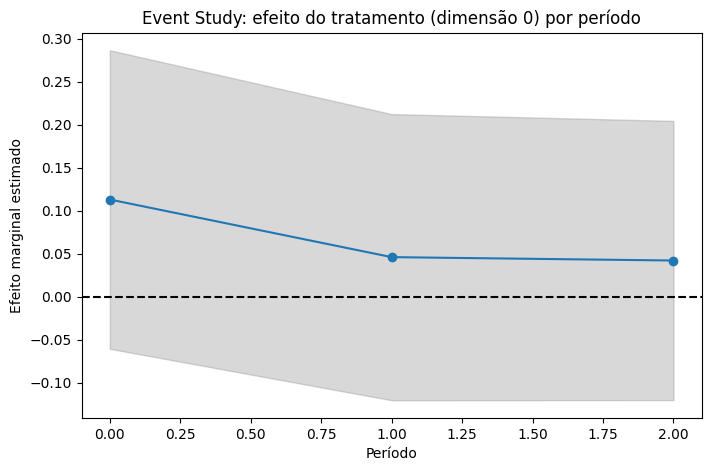

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Coeficientes e intervalos de confiança
coef = est.coef_.flatten()
lower, upper = est.coef__interval()

# Supondo que T tem 2 colunas e 3 períodos
n_periods = 3
n_treatments = 2

# Focar apenas na 1ª dimensão do tratamento
coef_0 = coef[0::n_treatments]      # índice 0, 2, 4 → períodos 0, 1, 2
lower_0 = lower[0::n_treatments].flatten()
upper_0 = upper[0::n_treatments].flatten()

# Eixo x: períodos (0, 1, 2)
periods = np.arange(n_periods)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(periods, coef_0, marker='o', label='Efeito estimado')
plt.fill_between(periods, lower_0, upper_0, color='gray', alpha=0.3, label='IC 95%')
plt.axhline(0, color='black', linestyle='--')
plt.title("Event Study: efeito do tratamento (dimensão 0) por período")
plt.xlabel("Período")
plt.ylabel("Efeito marginal estimado")
plt


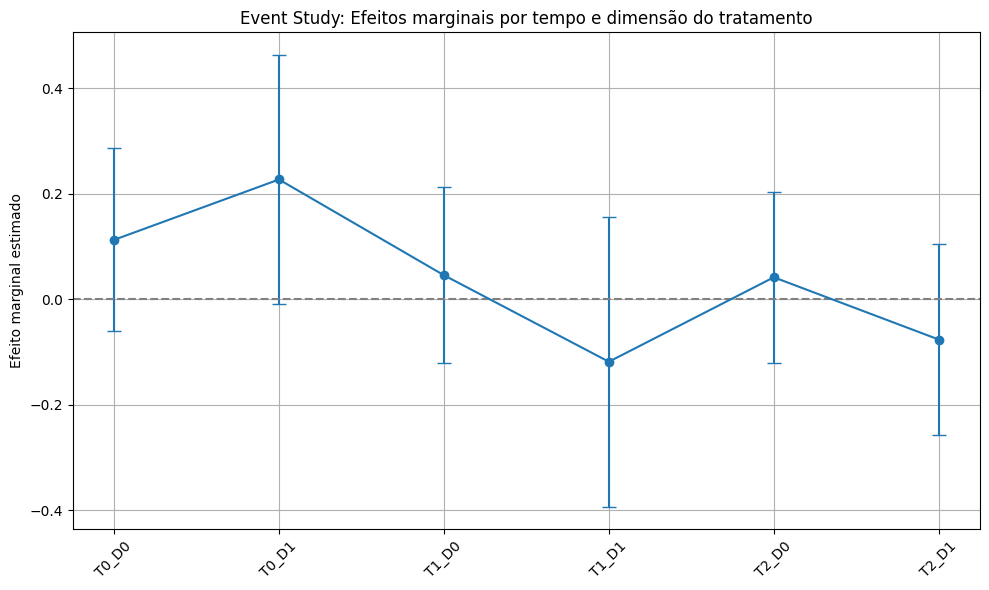

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Coeficientes estimados
coefs = est.coef_  # shape: (n_periods * treatment_dims, )
ci_low, ci_high = est.coef__interval()

# Número de períodos e dimensões do tratamento
treatment_dim = T.shape[1]
time_labels = [f'T{t}_D{d}' for t in range(n_periods) for d in range(treatment_dim)]

# Gráfico
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=np.arange(len(coefs)),
    y=coefs.flatten(),
    yerr=[coefs.flatten() - ci_low.flatten(), ci_high.flatten() - coefs.flatten()],
    fmt='o-', capsize=5
)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(ticks=np.arange(len(time_labels)), labels=time_labels, rotation=45)
plt.title("Event Study: Efeitos marginais por tempo e dimensão do tratamento")
plt.ylabel("Efeito marginal estimado")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import numpy as np
from econml.panel.dml import DynamicDML
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

# Parâmetros
n_groups = 100
n_periods = 10
rng = np.random.default_rng(42)

# Simulando dados
n = n_groups * n_periods
groups = np.repeat(np.arange(n_groups), n_periods)  # IDs de grupo

X = rng.normal(size=(n, 3))
W = rng.normal(size=(n, 2))
T = rng.normal(size=(n,))
Y = 0.5 * T + X @ np.array([1, -1, 0.5]) + rng.normal(size=n)

# Estimador DynamicDML
dml = DynamicDML(
    model_y=RandomForestRegressor(n_estimators=100, max_depth=3),
    model_t=LassoCV(),
    discrete_treatment=False
)

# Estimação
dml.fit(Y, T, X=X, W=W, groups=groups)

# Efeitos causais
effect = dml.effect(X)
print("Estimativas do efeito causal dinâmico:")
print(effect)




Estimativas do efeito causal dinâmico:
[-1.42115343e+00 -1.20970921e+00 -3.22872336e-01  8.22982725e-01
  2.17486927e-01  1.70919768e+00 -8.39088431e-01  1.45964802e+00
 -1.35162034e-01 -4.64048193e-01 -2.12437148e+00  4.01048718e-01
  1.77512577e-01 -6.50907772e-01  7.12667359e-01  8.10005600e-02
 -8.84903649e-01 -1.27376369e+00  2.90003885e-01 -2.70169736e+00
  1.41970614e+00 -7.69634512e-01 -4.96746757e-01  2.22736150e-01
  1.10513612e+00 -1.08392851e+00 -1.15111236e+00  7.12559419e-01
  1.79513712e+00 -7.17153334e-02 -4.85934919e-01  8.91091422e-02
  5.20947097e-01 -1.69586734e-01  1.37646657e+00 -1.13885647e-01
 -2.14486960e+00  3.66428931e-01 -5.50608864e-01  9.99809853e-01
  9.84479403e-01 -1.20823570e+00 -1.77123569e+00  1.63779751e+00
  1.78201318e-01  6.36802161e-01 -7.53142299e-01 -3.64780046e-01
  9.94036747e-01  6.05369518e-01  6.84659500e-01 -7.37153048e-01
  7.18321988e-01  1.14965979e+00 -3.24550451e+00  1.16660981e+00
  5.51487301e-01  8.04736026e-02  3.33819885e-01 -4

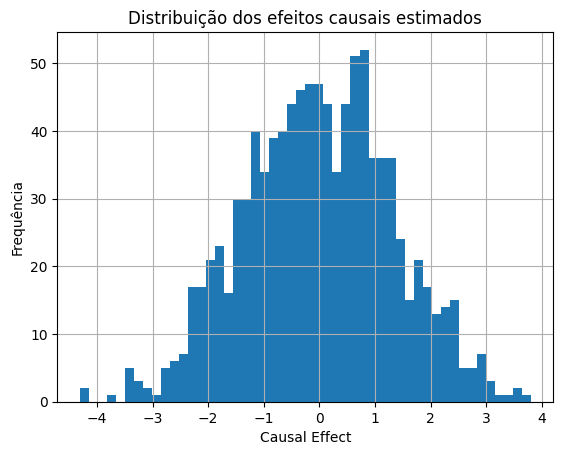

In [7]:
import matplotlib.pyplot as plt

plt.hist(effect, bins=50)
plt.title("Distribuição dos efeitos causais estimados")
plt.xlabel("Causal Effect")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


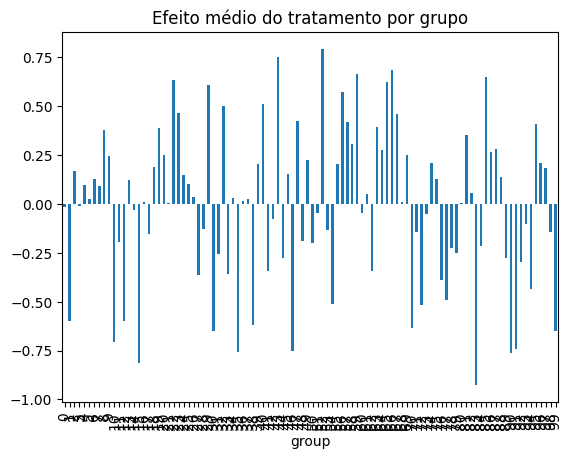

In [8]:
import pandas as pd

df = pd.DataFrame({
    'effect': effect,
    'group': groups  # ou outra variável categórica
})
grouped = df.groupby('group')['effect'].mean()
grouped.plot(kind='bar', title='Efeito médio do tratamento por grupo')
plt.show()


In [9]:
# Assumindo que você tenha:
# - `groups`: vetor com IDs (ex: startup)
# - `time`: vetor com os períodos (ex: 0,1,...,9)
# - `T0_dict`: dicionário ou vetor com o tempo de tratamento por grupo

# Exemplo fictício:
time = np.tile(np.arange(n_periods), n_groups)
T0_dict = {g: 5 for g in range(n_groups)}  # todos tratados no período 5

# Criar vetor com o tempo relativo ao tratamento
rel_time = np.array([time[i] - T0_dict[groups[i]] for i in range(len(groups))])


In [10]:
import pandas as pd

df = pd.DataFrame({
    'group': groups,
    'rel_time': rel_time,
    'effect': effect
})

# Calcular efeito médio por tempo relativo
avg_effect = df.groupby('rel_time')['effect'].mean()
std_error = df.groupby('rel_time')['effect'].std() / np.sqrt(df.groupby('rel_time').size())


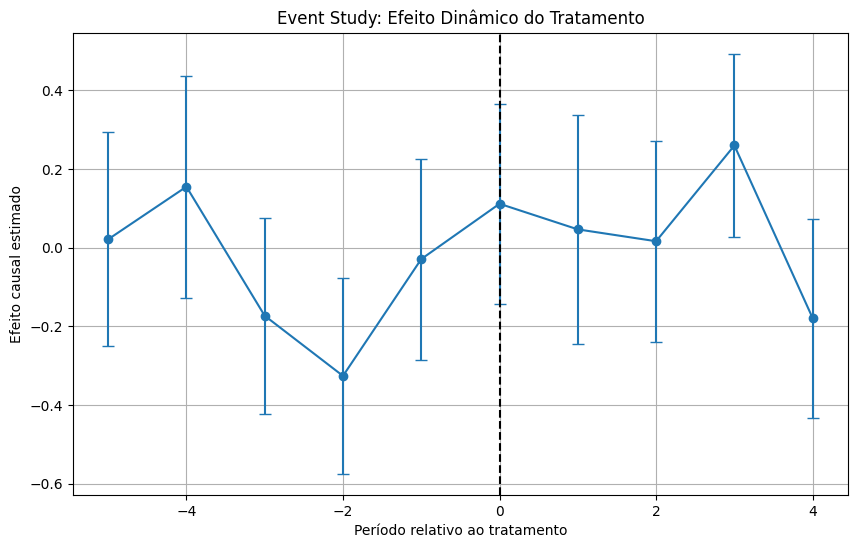

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.errorbar(avg_effect.index, avg_effect.values, yerr=1.96*std_error, fmt='o-', capsize=4)
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Event Study: Efeito Dinâmico do Tratamento")
plt.xlabel("Período relativo ao tratamento")
plt.ylabel("Efeito causal estimado")
plt.grid(True)
plt.show()


### Automação 

A automação de tarefas com python

Jinja2 - https://jinja.palletsprojects.com/en/2.11.x/

O **Jinja2** é um motor de template para Python, que permite a criação de templates de texto simples, que podem ser usados para gerar qualquer tipo de texto, como HTML, XML ou Markdown.

O LaTeX é um sistema de preparação de documentos para a composição de textos matemáticos e científicos. O LaTeX é amplamente utilizado na academia para a escrita de artigos, teses e livros.

Automação em LaTeX com python: 